In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split 

In [2]:
data=pd.read_csv("house_rental_data.csv.txt")

In [3]:
data.head()

,Unnamed: 0,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
0,1,1177.698,2,7,2,2,2,62000
1,2,2134.800,5,7,4,2,2,78000
2,3,1138.560,5,7,2,2,1,58000
3,4,1458.780,2,7,3,2,2,45000
4,5,967.776,11,14,3,2,2,45000


In [4]:
data.drop("Unnamed: 0",axis=1,inplace=True)

In [5]:
data.shape

(645, 7)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 645 entries, 0 to 644
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sqft         645 non-null    float64
 1   Floor        645 non-null    int64  
 2   TotalFloor   645 non-null    int64  
 3   Bedroom      645 non-null    int64  
 4   Living.Room  645 non-null    int64  
 5   Bathroom     645 non-null    int64  
 6   Price        645 non-null    int64  
dtypes: float64(1), int64(6)
memory usage: 35.4 KB


In [7]:
data.isnull().sum()

Sqft           0
Floor          0
TotalFloor     0
Bedroom        0
Living.Room    0
Bathroom       0
Price          0
dtype: int64

In [8]:
data.columns

Index(['Sqft', 'Floor', 'TotalFloor', 'Bedroom', 'Living.Room', 'Bathroom',
       'Price'],
      dtype='object')

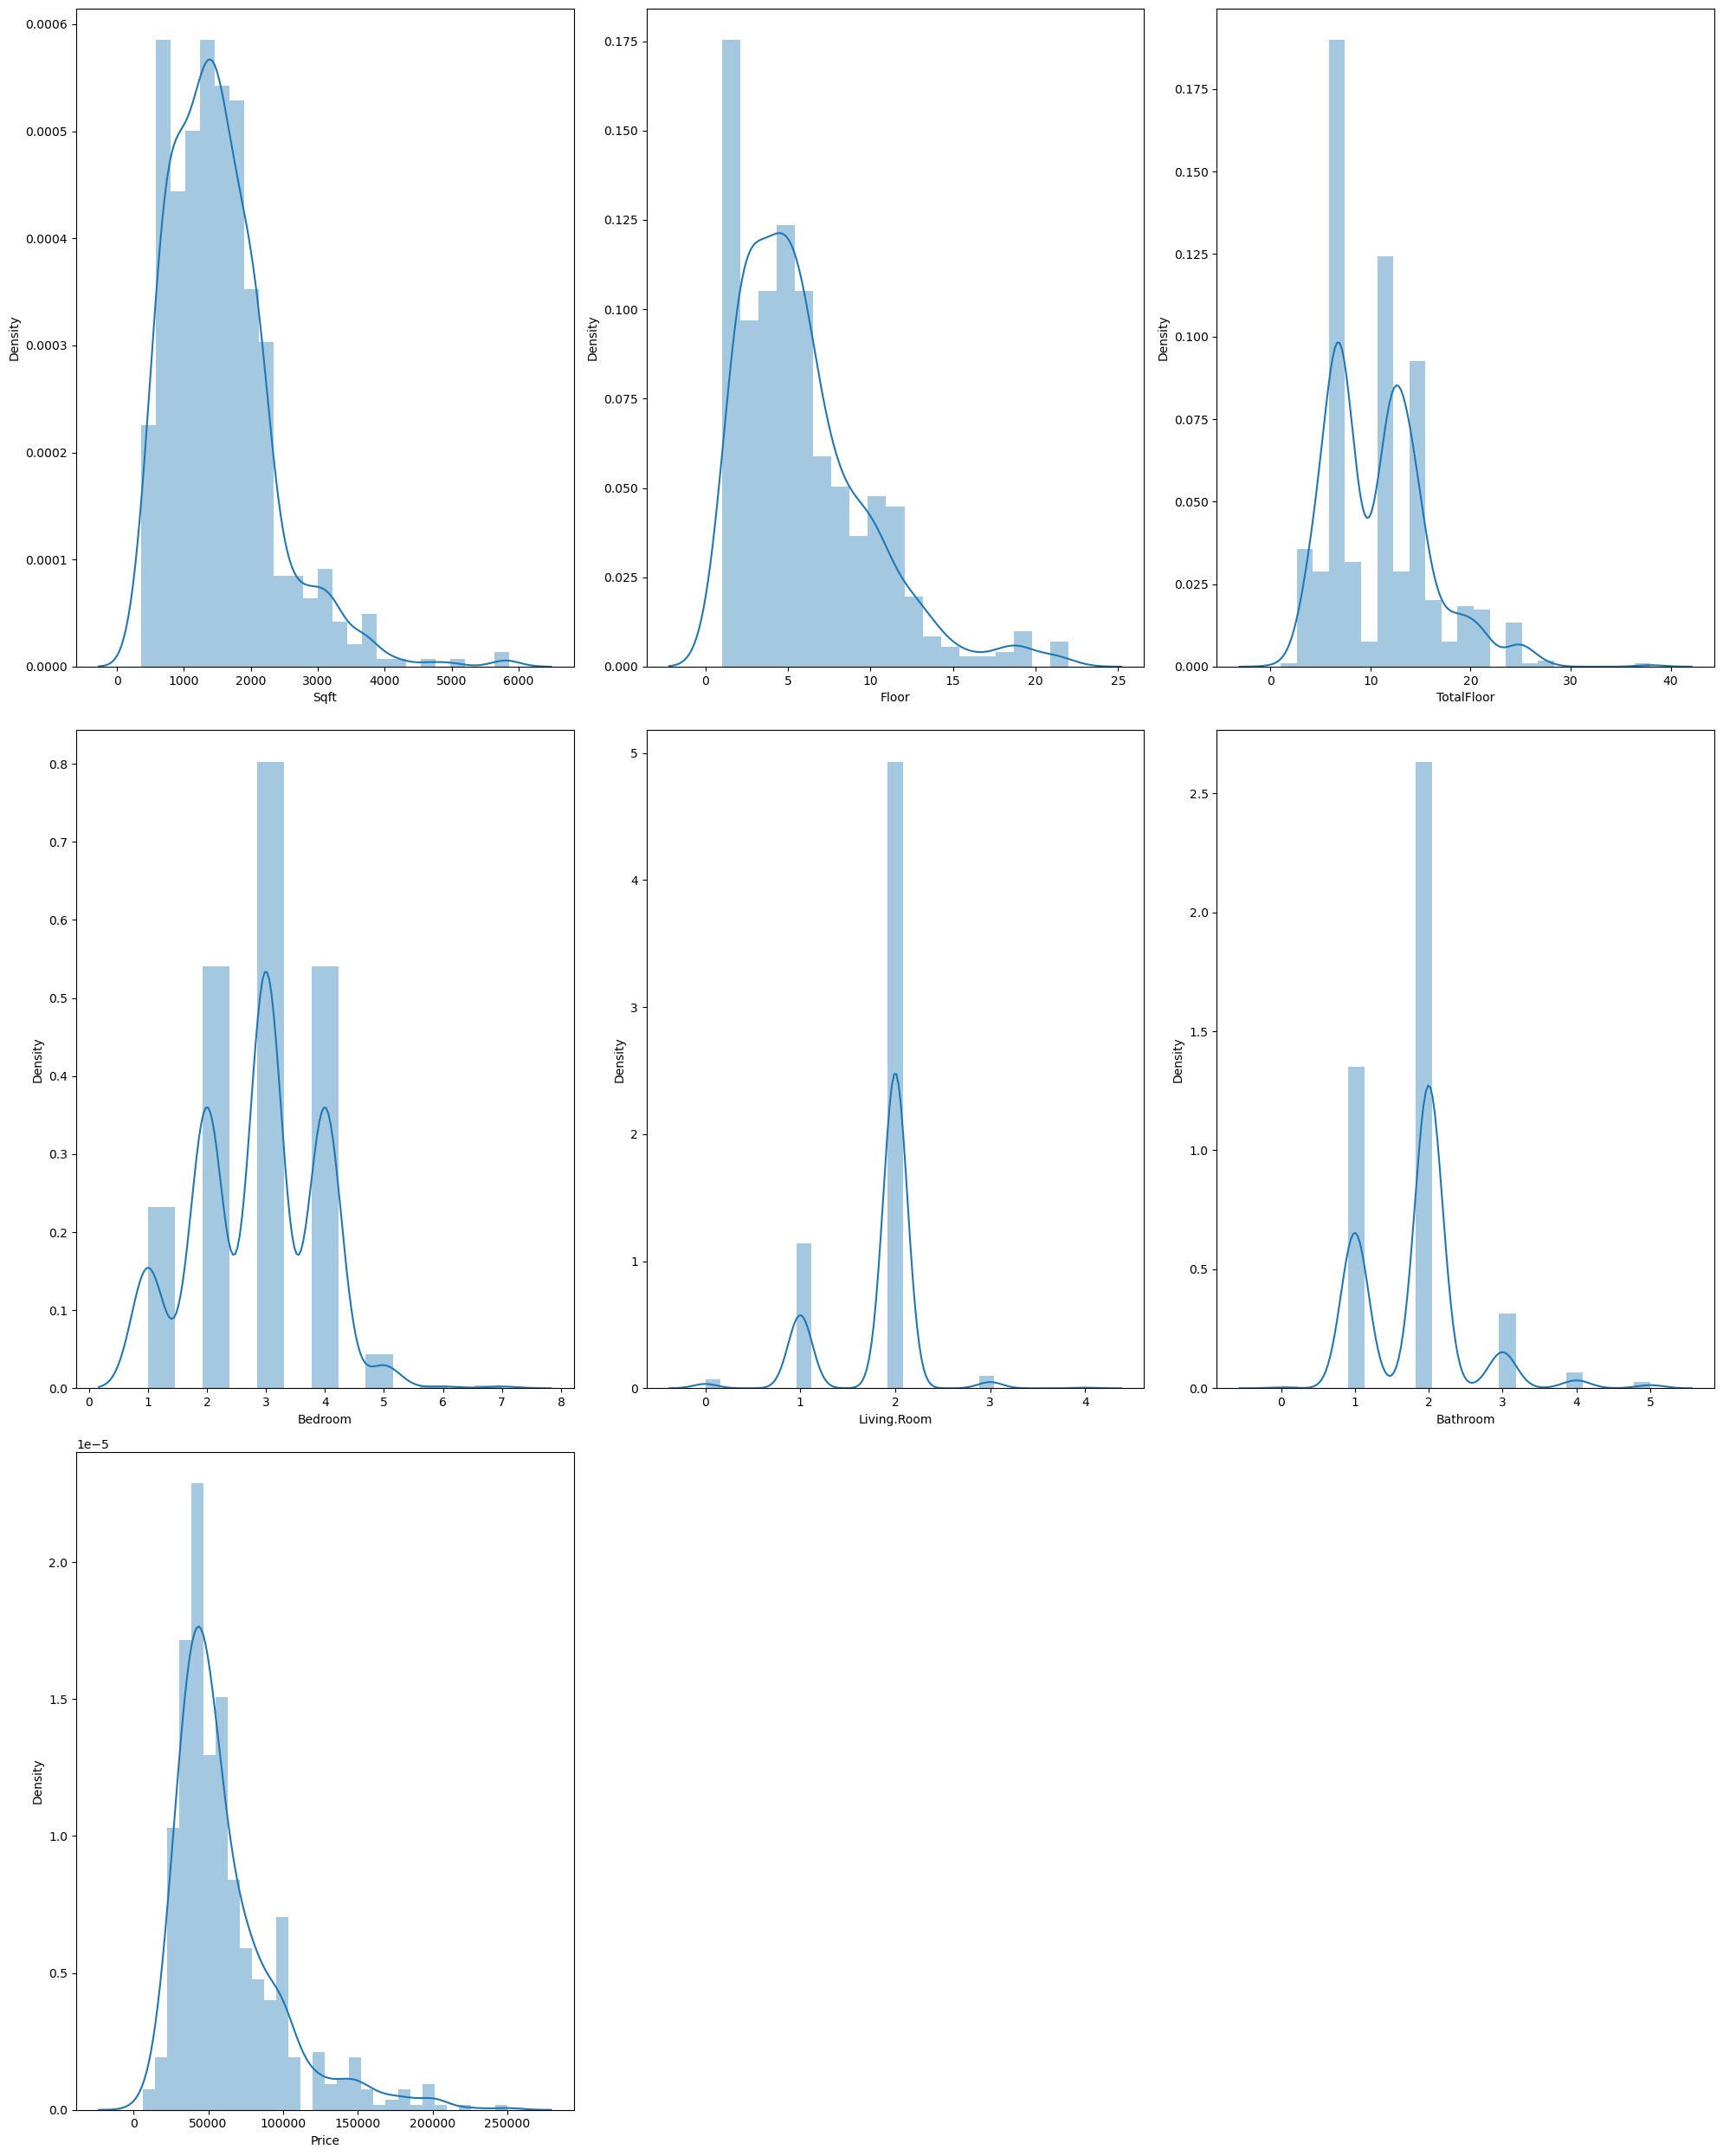

In [9]:
plt.figure(figsize=(20,25))
for i,j in enumerate(data):
    plt.subplot(3,3,i+1)
    sns.distplot(data[j])
plt.tight_layout()
    

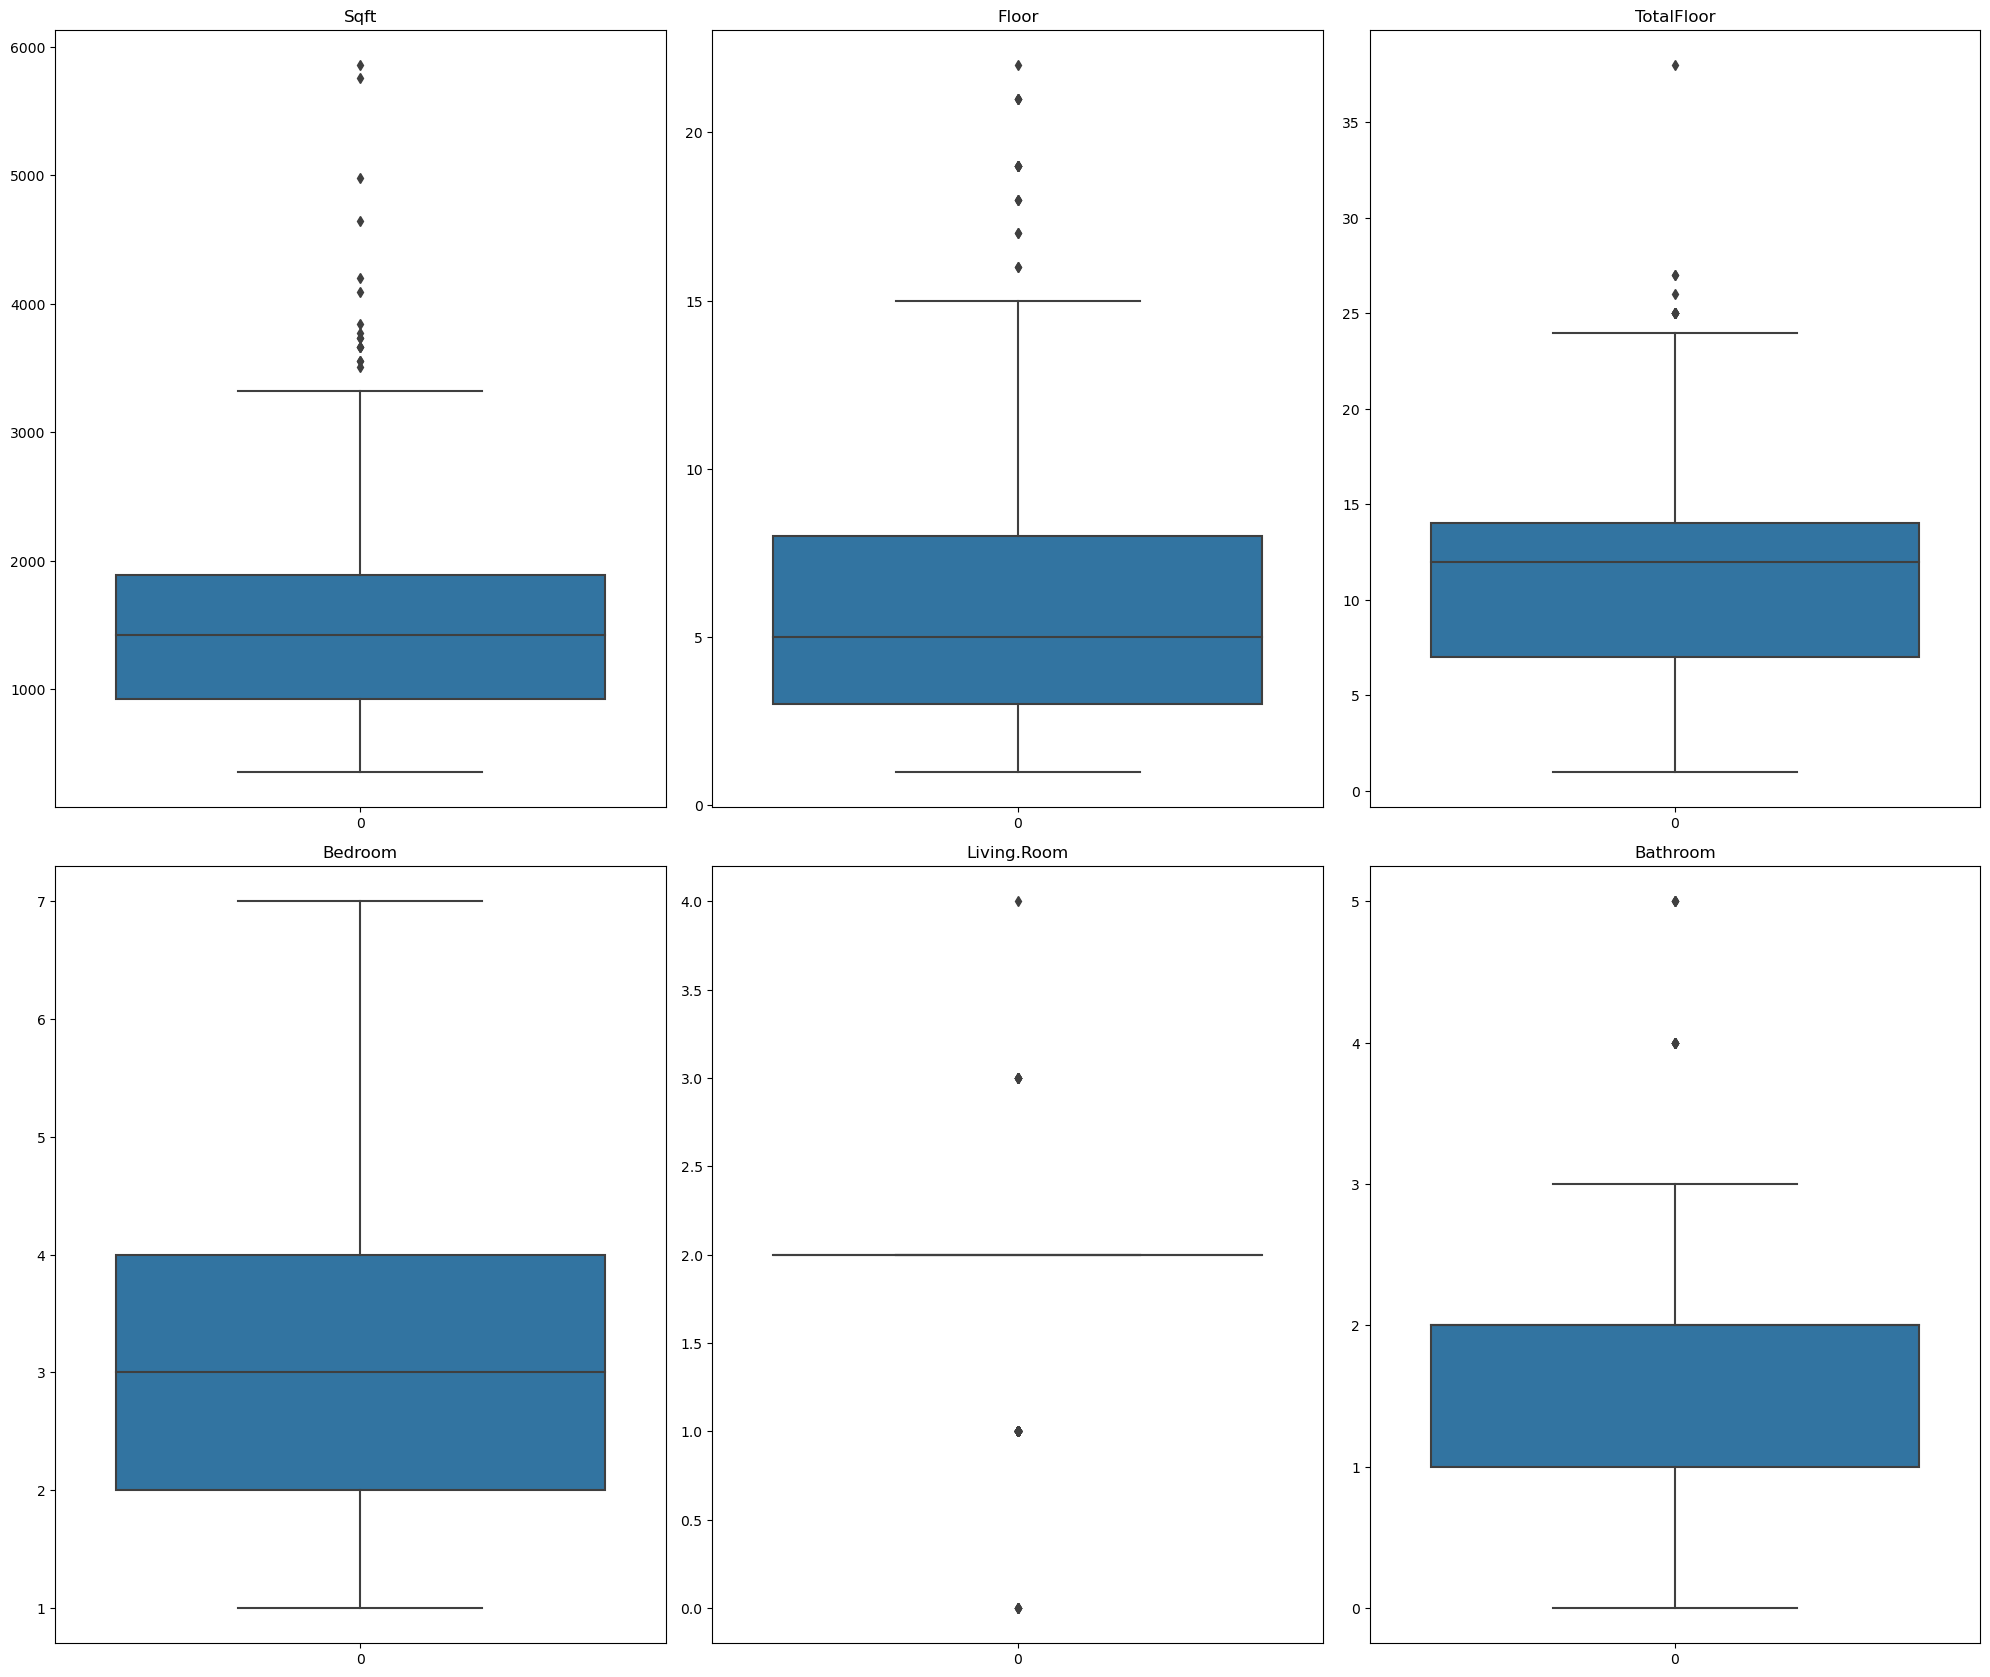

In [26]:
plt.figure(figsize=(20,25))
for i,j in enumerate(data.iloc[:,:-1]):
    plt.subplot(3,3,i+1)
    sns.boxplot(data[j])
    plt.title(j)
plt.tight_layout()

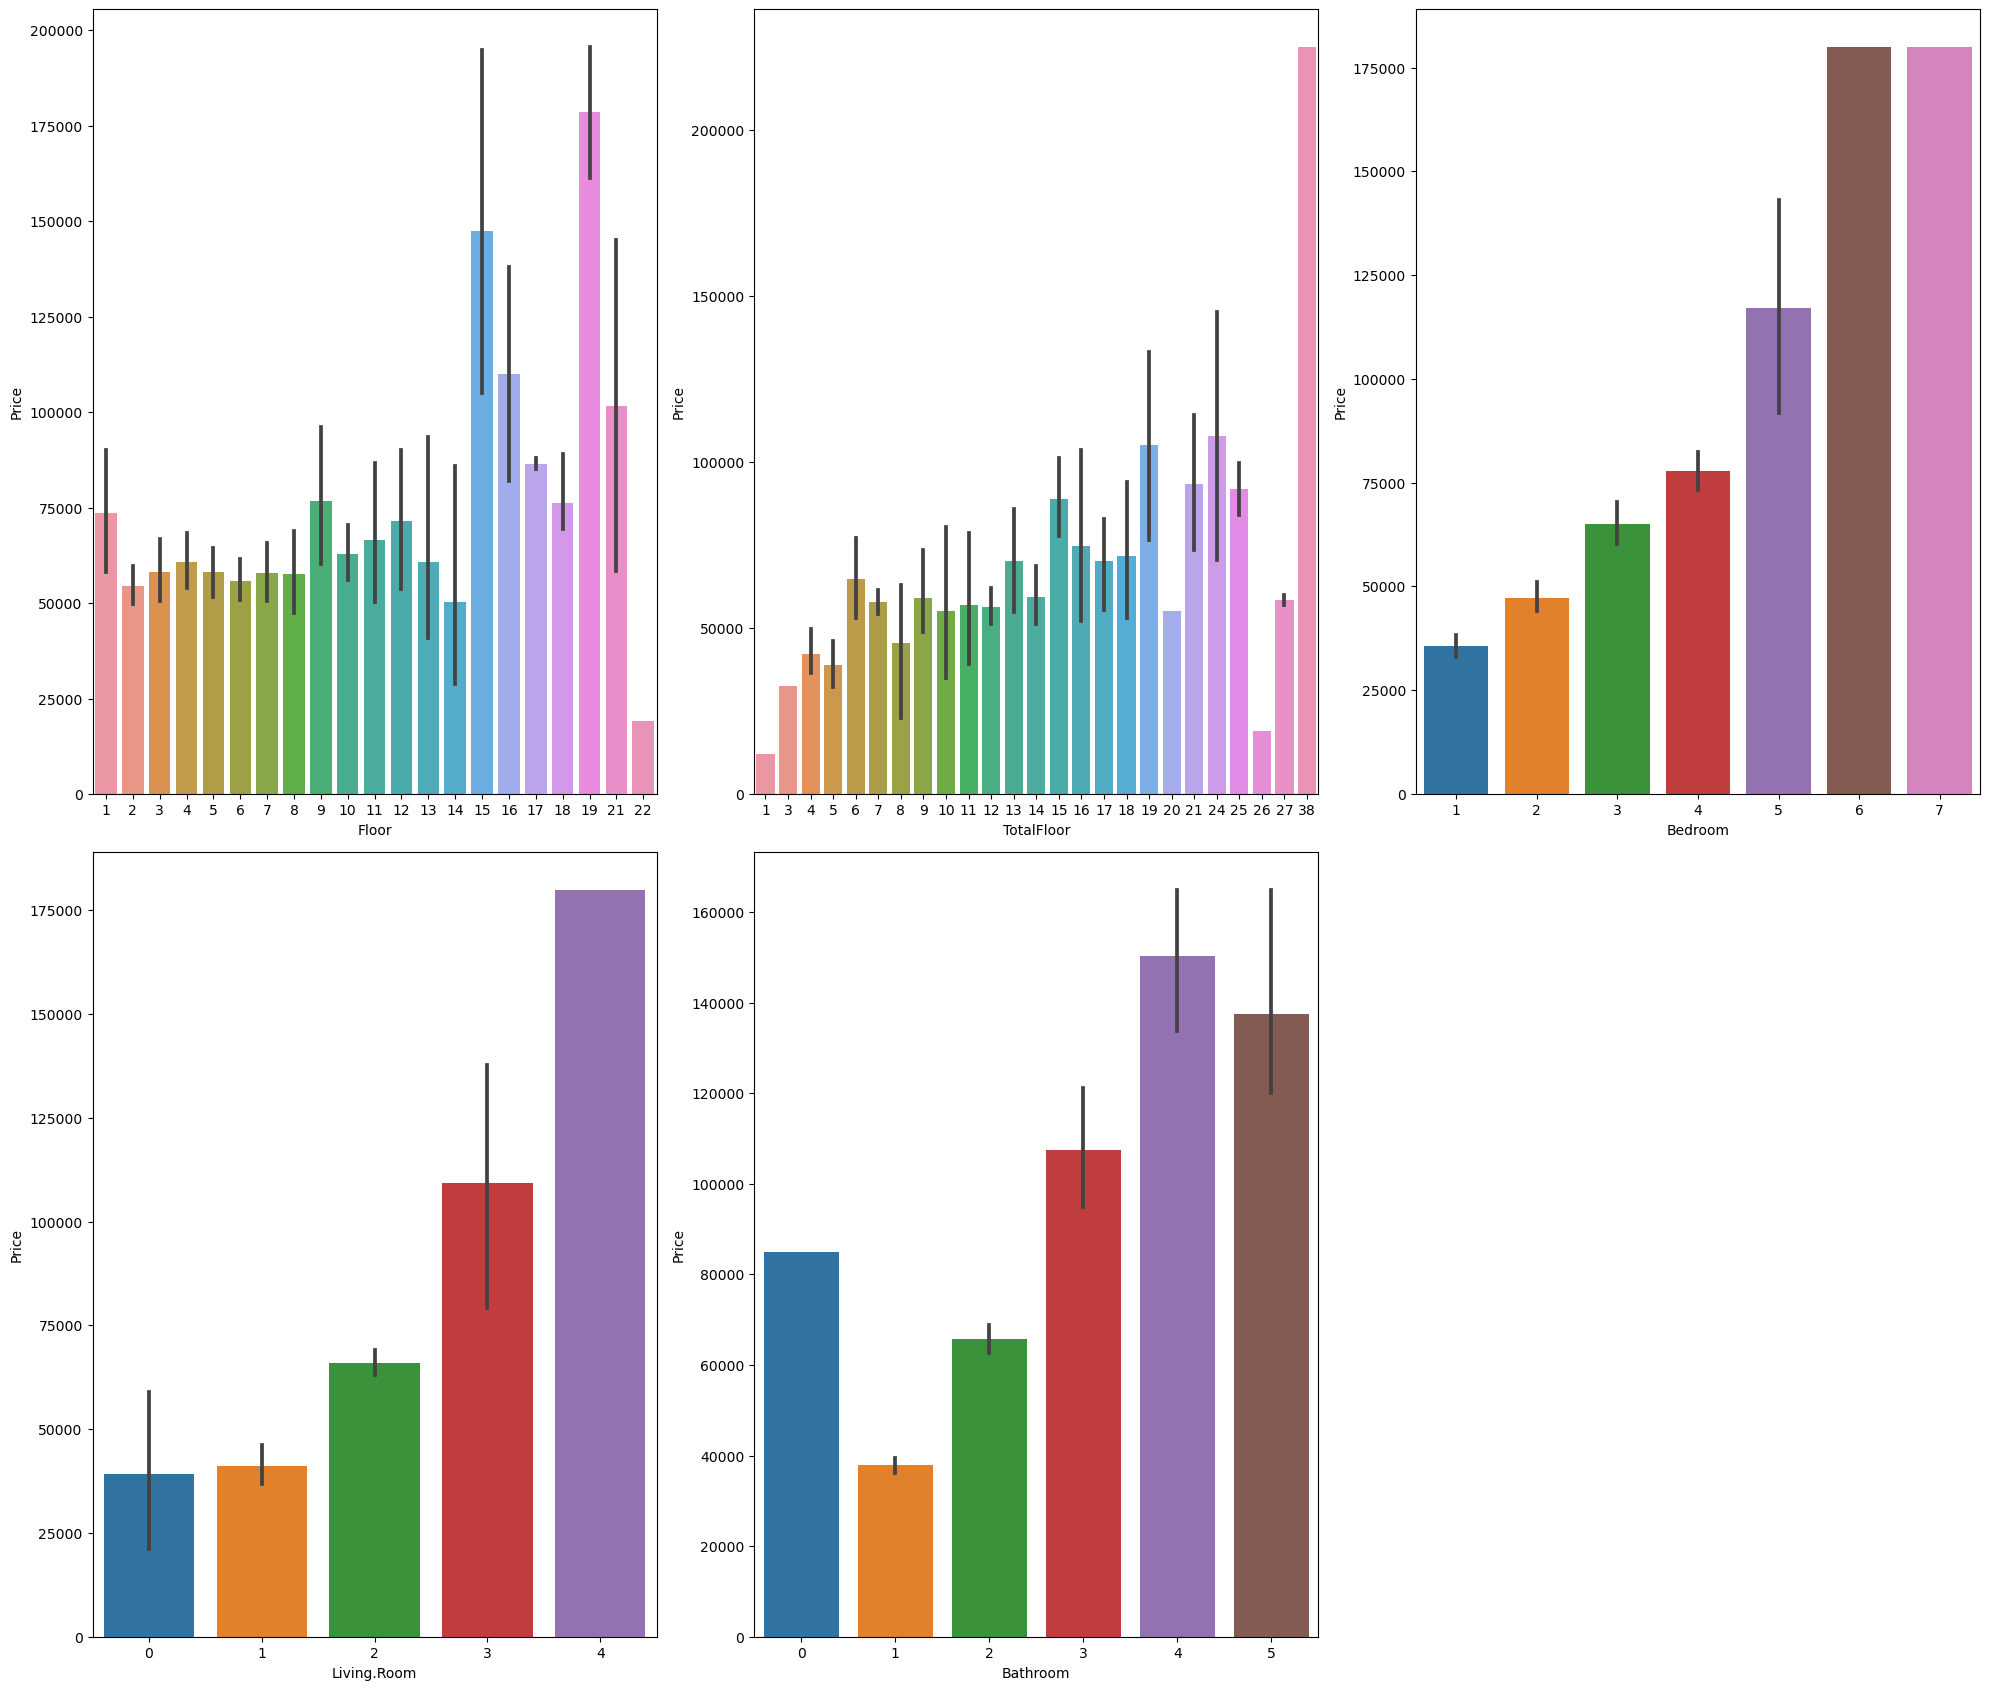

In [30]:
plt.figure(figsize=(20,25))
for i,j in enumerate(data.iloc[:,1:-1]):
    plt.subplot(3,3,i+1)
    sns.barplot(x=data[j],y=data["Price"])
    plt.xlabel(j)
    plt.ylabel("Price")
plt.tight_layout()

<Axes: xlabel='TotalFloor', ylabel='Sqft'>

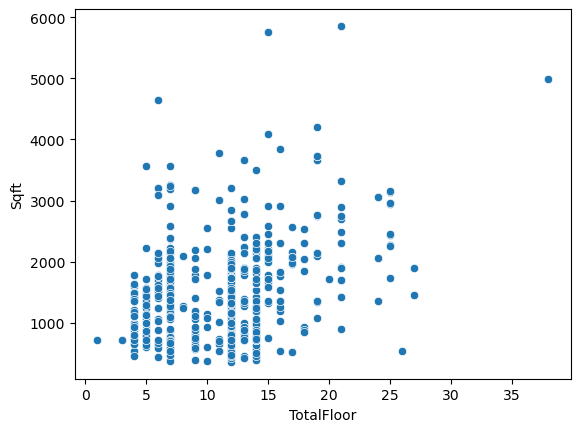

In [12]:
sns.scatterplot(x=data.TotalFloor,y=data.Sqft)

<Axes: xlabel='Bedroom', ylabel='Sqft'>

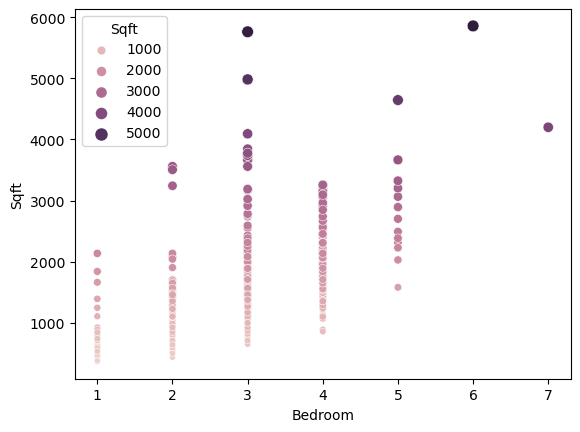

In [13]:
sns.scatterplot(x=data.Bedroom,y=data.Sqft,hue=data.Sqft,size=data.Sqft)

<Axes: xlabel='Sqft', ylabel='Price'>

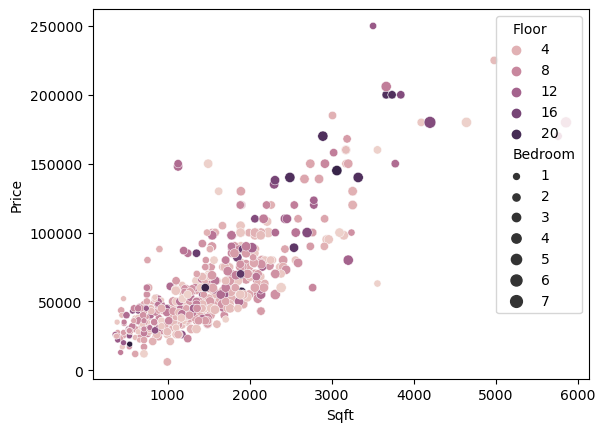

In [14]:
sns.scatterplot(x=data.Sqft,y=data.Price,hue=data.Floor,size=data.Bedroom)

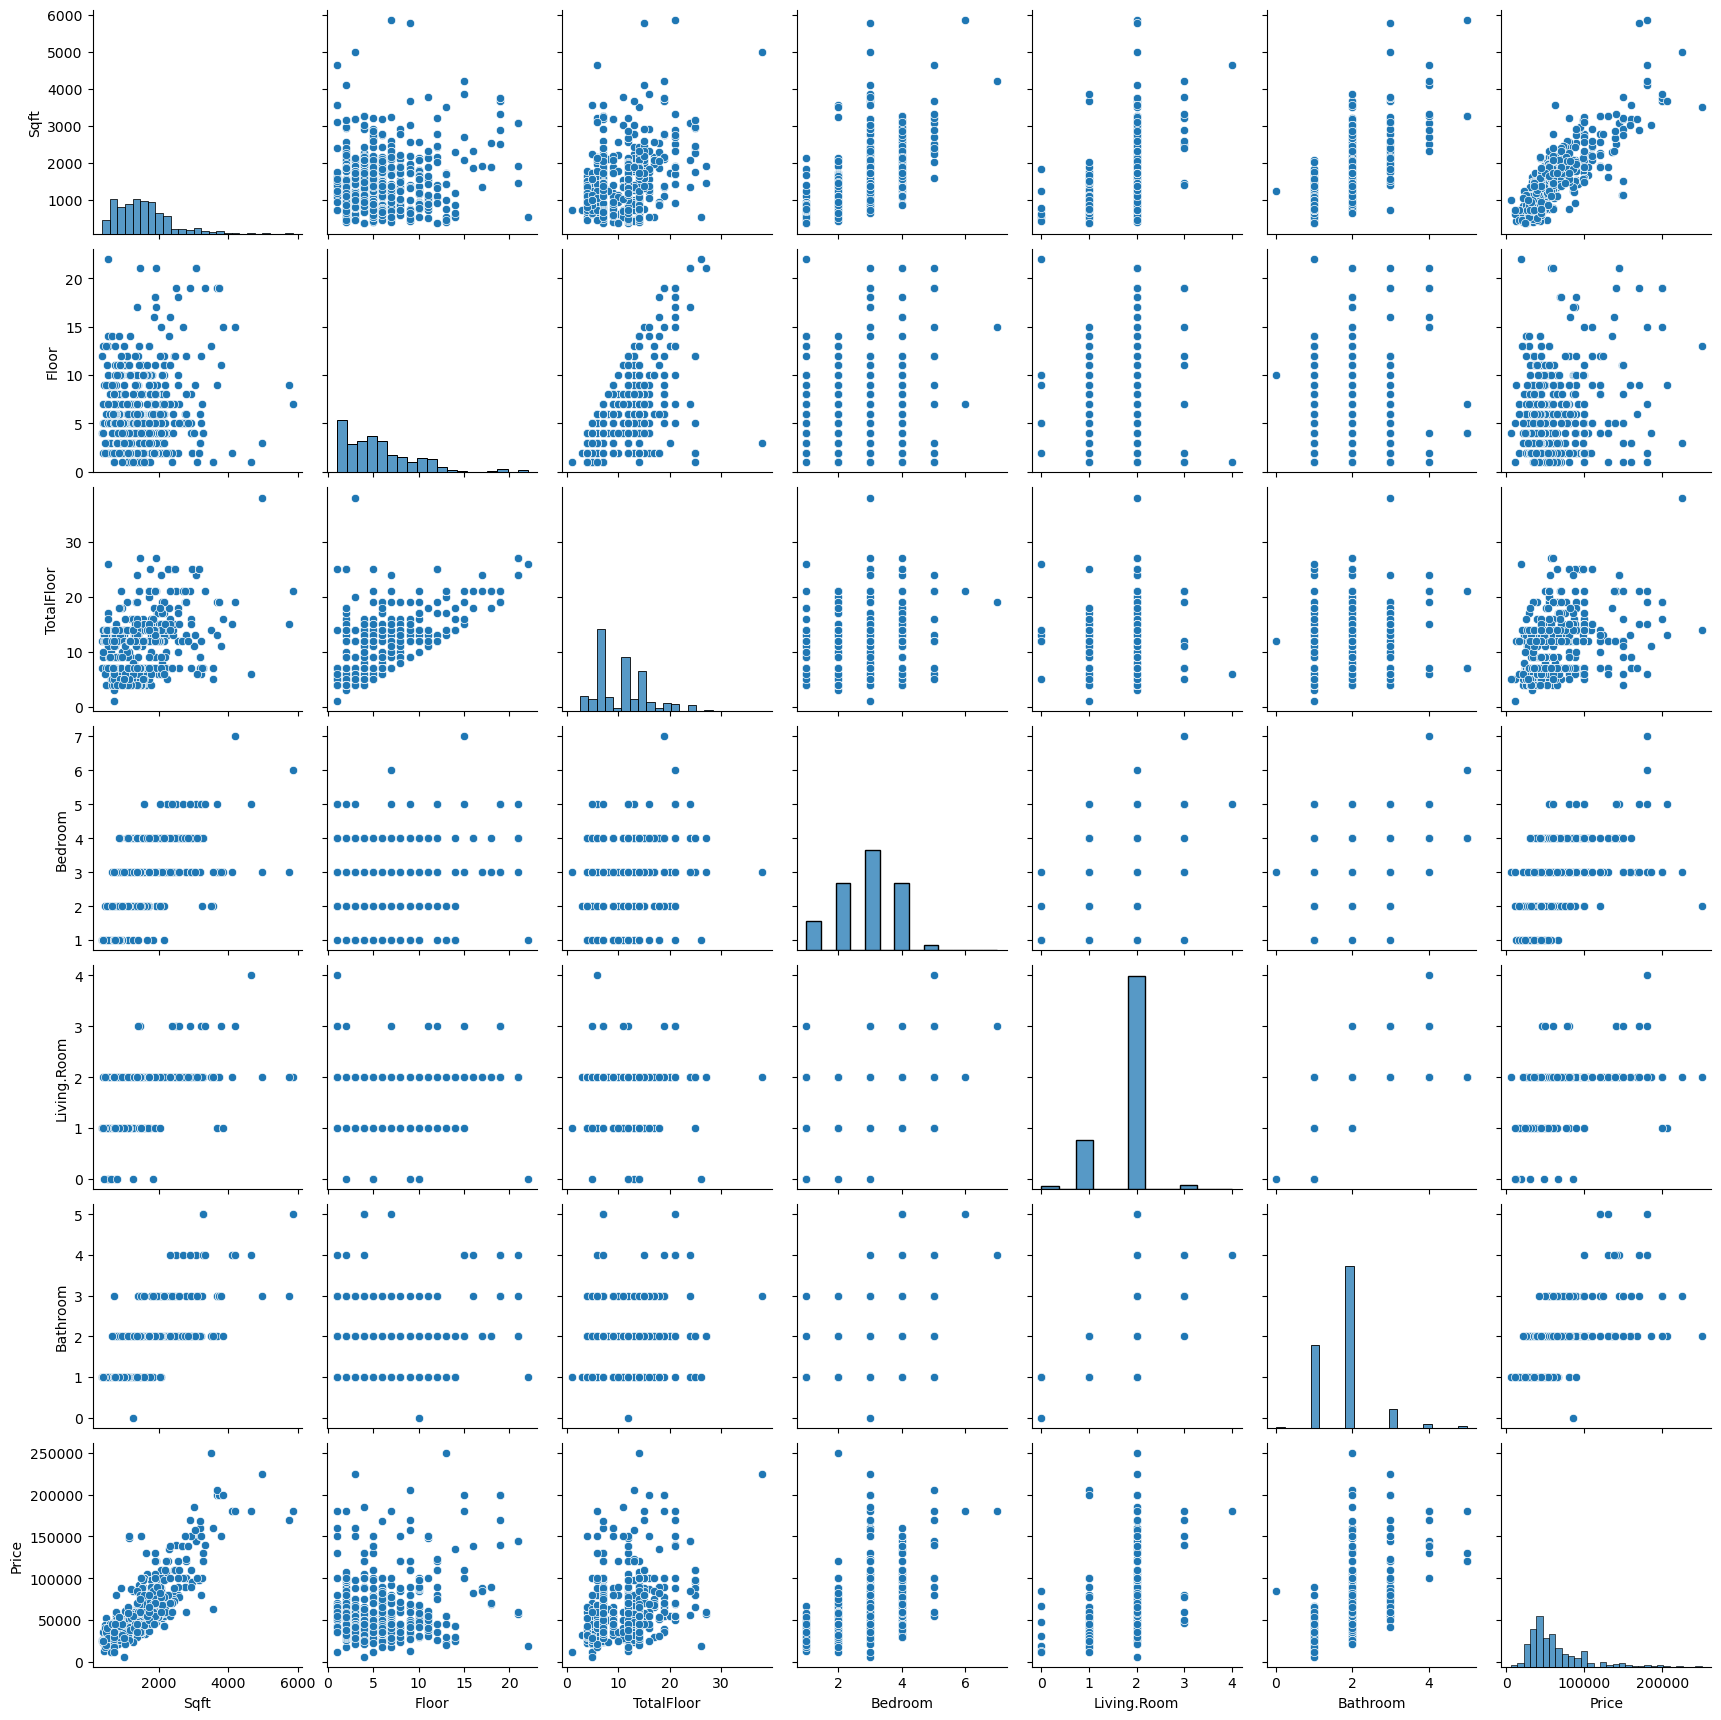

In [32]:
sns.pairplot(data)

In [15]:
x=data.drop("Price",axis=1)
y=data.Price

In [16]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=42)

In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
from sklearn.neighbors import KNeighborsRegressor

In [19]:
Knn_reg=KNeighborsRegressor(n_neighbors=3,metric="manhattan")

In [20]:
Knn_reg.fit(x_train,y_train)

KNeighborsRegressor(metric='manhattan', n_neighbors=3)

In [21]:
pred=Knn_reg.predict(x_test)

In [22]:
pred

array([ 50000.        ,  30666.66666667,  52000.        ,  37333.33333333,
        87666.33333333,  66666.66666667,  79333.33333333,  74333.33333333,
        66666.66666667,  36333.33333333,  49000.        ,  33000.        ,
        44333.33333333,  35333.33333333,  26166.66666667,  77666.66666667,
        53706.66666667,  33166.66666667,  44666.66666667,  30666.66666667,
        71333.33333333,  49000.        ,  41000.        , 201666.66666667,
       200000.        ,  48500.        ,  52666.66666667,  32266.66666667,
        36166.66666667,  32666.66666667,  41000.        ,  81000.        ,
        95000.        ,  35333.33333333,  33000.        ,  64333.33333333,
        98333.33333333,  60666.66666667,  43833.33333333,  61333.33333333,
        66666.66666667, 156333.33333333,  67666.66666667,  98333.33333333,
        39900.        ,  37666.66666667,  32000.        ,  46666.33333333,
        62200.        ,  25699.66666667,  46666.66666667,  66666.66666667,
       193333.33333333,  

In [23]:
from sklearn.metrics import r2_score
score=r2_score(y_test,pred)
score

0.7467845752517379